
# Clouds Example

Reconstruct and event with clouds

Didactic and debugin purposes.

#### JA Hernando, May 2021

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import matplotlib.pyplot as plt

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds

import clouds.ridges    as ridges

In [22]:
plt.rcParams['image.cmap'] = 'Blues'

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sun May  2 18:59:05 2021


## Generate an event


Generate points along a line with a given dispersion in (x, y)

## Generate sample

In [4]:
def canvas(nx = 1, ny = 1, xsize = 4., ysize = 5):
    plt.figure(figsize = (ny * ysize, nx * xsize))
    subplot = lambda i : plt.subplot(nx, ny, i)
    return subplot

In [5]:
def generate_points(sizes, line = None, sigma = 1):
    
    size0   = np.min(sizes)
    npoints = len(sizes)
    ts = np.linspace(0, 1., npoints)
    ts = [ni * [ti,] for ni, ti in zip(sizes, ts)]
    ts.append(np.random.uniform(size = size0))
    ts = np.concatenate(ts)

    size = len(ts)
    iden = lambda x: x
    x, y = (iden, iden) if line is None else line
    xs   = x(ts) + sigma * np.random.normal(size = size)
    ys   = y(ts) + sigma * np.random.normal(size = size)
    
    return xs, ys

In [6]:
sizes = 1000 * np.array((2, 2, 3, 3, 2, 2))
scale, offset = 5, 2
line  = lambda x: scale * x,  lambda x: offset + scale * x
xs, ys = generate_points(sizes, line, sigma = 0.6)

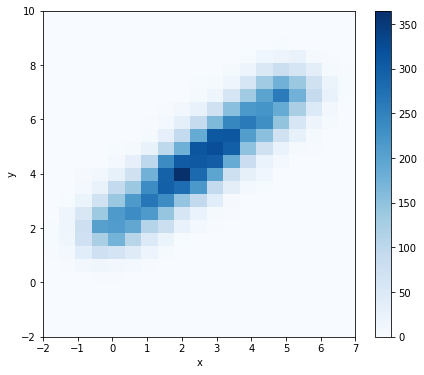

In [7]:
size  = 2
xbins = np.linspace(-2,  7, size * 10)
ybins = np.linspace(-2, 10, size * 13)

bins          = (xbins, ybins)
counts, _, _  = np.histogram2d(xs, ys, bins = bins)

subplot = canvas(1, 1, 6, 7)
subplot(1)
plt.hist2d(xs, ys, bins);
#plt.imshow(counts.T, origin = 'lower')
plt.xlabel('x'); plt.ylabel('y')
plt.colorbar();

## Clouds input

   * Input data are:
       
       * coors   : a list of coordinates of the points: (x, y)
       
       * steps   : a list with the steps in each dimention (x-step, y-step)
       
       * weights : the weigths or energy of each point (ene)

In [8]:
coors   = (xs, ys)
steps   = (xbins[1] - xbins[0], ybins[1] - ybins[0])
weights = np.ones(len(xs))

In [51]:
bins, mask, cells, df = clouds.clouds(coors, steps, weights)

find_nodes egrad  4
find_nodes egrad  21


## 1 Clouds - Nodes


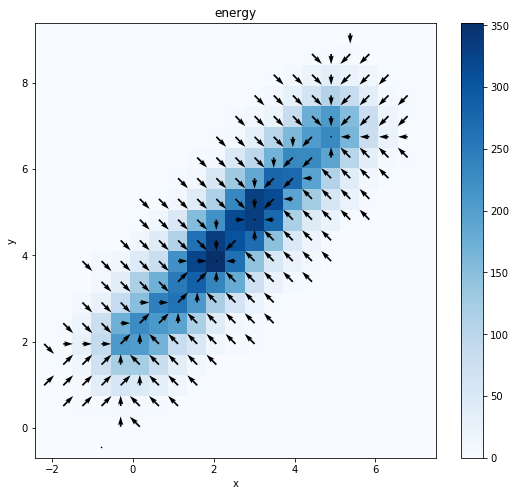

In [53]:
canvas(1, 1, 8, 9)

enes  = df.enes .values
egrad = df.egrad.values
epath = df.epath.values

plt.hist2d(*cells, bins = bins, weights = enes)
plt.xlabel('x'); plt.ylabel('y'); plt.title('energy')
plt.colorbar();
pltclouds.dcloud_grad(cells, epath);


## 2. Passes


### Define the convex region

  * Compute the laplacian and select the region with negative laplacian (dispersive region)

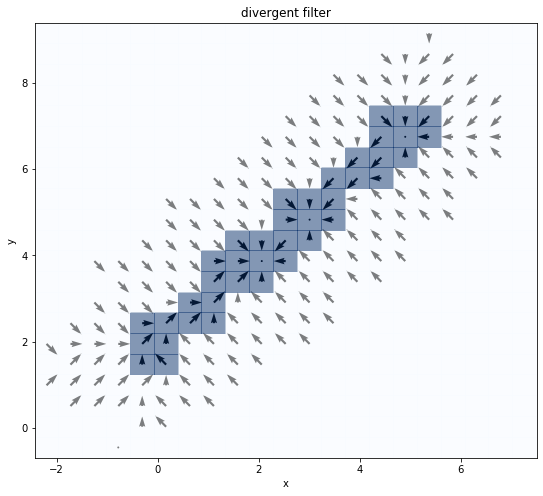

In [55]:
subplot = canvas(1, 1, 8, 9)

isdiver = df.isdiver

pltclouds.dcloud_grad(cells, epath);
plt.hist2d(*cells, bins, weights = isdiver, alpha = 0.5)
plt.xlabel('x'); plt.ylabel('y'); plt.title('divergent filter');

### Identify the cells in the border 

 

In [56]:
isborder  = df.isborder.values
node      = df.node    .values
lpath     = df.lpath   .values
ispass    = df.ispass  .values

Text(0.5, 1.0, 'passes')

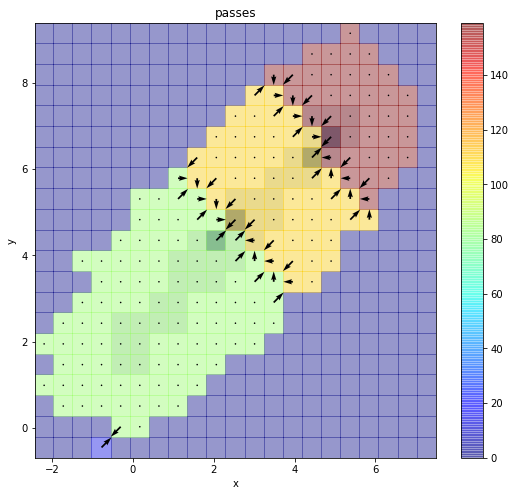

In [57]:
canvas(1, 1, 8, 9)
plt.hist2d(*cells, bins, weights = isdiver, alpha = 0.2);
plt.hist2d(*cells, bins, weights = ispass , alpha = 0.4);
plt.hist2d(*cells, bins, weights = node   , alpha = 0.4, cmap = 'jet');
plt.colorbar();
pltclouds.dcloud_grad(cells, lpath)
plt.xlabel('x'); plt.ylabel('y'); plt.title(r'passes')

## 3. Sources

   * Selection of the sources 

In [58]:
cells_sel = clouds.cells_selection
laplace  = df.laplace .values
issource = df.issource.values
isnode   = df.isnode  .values
ispass   = df.ispass  .values

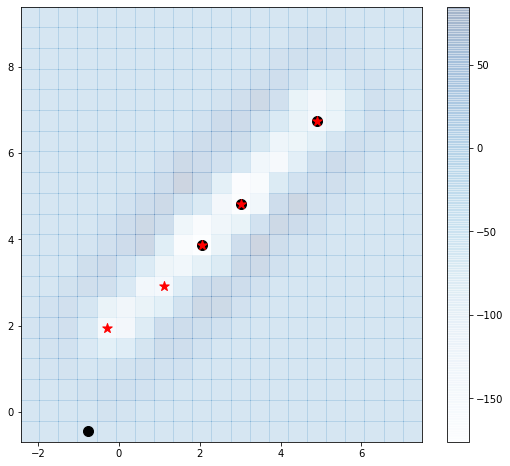

In [71]:
c0, c1 = 'black', 'red'
canvas(1, 1, 8, 9)
plt.hist2d(*cells, bins, weights = laplace, alpha = 0.2)
plt.colorbar();
plt.scatter(*cells_sel(cells, isnode) , marker = 'o', s = 100, color = c0);
#plt.scatter(*cells_sel(cells, ispass    ), marker = '^', color = c0);
plt.scatter(*cells_sel(cells, issource), marker = '*', s= 100, color = c1);

### Ridge

In [72]:
eridge = df.eridge.values

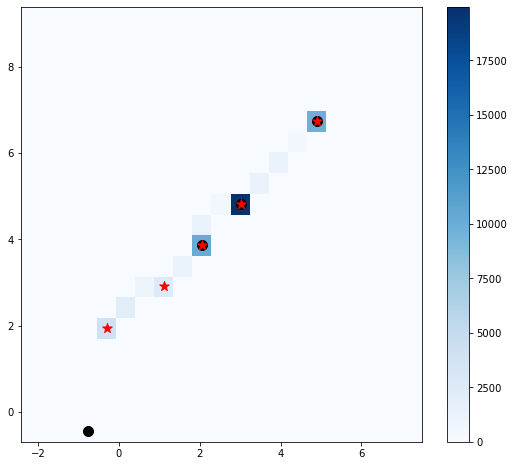

In [74]:
c0, c1 = 'black', 'red'
canvas(1, 1, 8, 9)
plt.hist2d(*cells, bins, weights = eridge, alpha = 1.)
plt.colorbar();
plt.scatter(*cells_sel(cells, isnode) , marker = 'o', s = 100, color = c0);
#plt.scatter(*cells_sel(cells, ispass    ), marker = '^', color = c0);
plt.scatter(*cells_sel(cells, issource), marker = '*', s= 100, color = c1);